# Paper figure 5
### Derived from Notebook 21, for testing the SETP-identification algorithms

In [1]:
import sys
sys.path.append("..") #import folder which is one level higher

In [2]:
from classes import *

import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import random

from tqdm.notebook import trange, tqdm
from pathlib import Path

from matplotlib import patches
from matplotlib.collections import PatchCollection

In [3]:
#Load the experiments
input_path = "../temp/experiments/experiment_selection_2021_2_19.p"
assert Path(input_path).exists()
experiments = pickle.load( open( input_path, "rb" ) )
print(len(experiments))

1400


In [4]:
#SET THE PARAMETERS TO DO THE ANALYSIS
window = 4 #The size of the rolling window
margin = 3 # The margin around the TP

#Criteria
c1 = 0.15 #fraction of change relative to house price at t0
c2 = 1e9 #variance
c3 = 10 #percent

In [5]:
with tqdm(total=len(experiments)) as pbar:
    for experiment in experiments:
        experiment.create_Metrics() #TODO: GIVE CONTROL OVER THE METRICS TO BE CREATED
        for M in experiment.allMetrics:
            M.create_statistics(window=window) #Create summary statistics for the metric(t)
            M.find_SETP_candidates(c1=c1,c2=c2,c3=c3,margin=margin)
            M.select_SETPs(sign=-1,add_stable_before=True) #Also consider states which are only stable before as policy relevant
        pbar.update(1)

### Visualisations of individual experiments

In [6]:
#todo: move to tipping.py

def add_suptitle(fig,exp,M):
    """Add some information about the experiment as title to the figure
    
    Arguments:
        fig (Matplotlib Figure) : Figure created with M.plot_SETPs
        exp : experiment object from which to draw the metadata
        metric : the metric from which to draw the metadata
        
    Returns:
        fig (Matplotlib Figure) : the input figure with a suptitle
    
    """
    
    #Make the data of the experiment more readable before sending it to the string
    housing_market = M.name.split('_')[-1]
    if housing_market == 'subj':  housing_market = 'Boundedly rational'
    else: housing_market = 'Rational'
    
    area_name = M.name.split('_')[1]
    if area_name == 'A': area_name = 'A (Heijplaat, outer-dike)'
    else: area_name = 'B (City Centre, inner-dike)'
    
    #Create the title string
    suptitle_string = (\
    '''Sea level rise scenario: {} ||| Storm surge series: {} ||| Mayor: {} ||| IT: {}
    {} housing market ||| Area {}'''.format(
                                   exp.SurgeLevel.corresponding_SLR_Scenario.name.split('_')[-1],
                                   exp.SurgeLevel.corresponding_SurgeHeight.name.split('_')[-1],        
                                   exp.Mayor.get_name(),
                                   str(exp.ImplementationTime).replace(' ',''),
                                   housing_market,
                                   area_name))
    fig.suptitle(suptitle_string)
    
    file_string = exp.SurgeLevel.corresponding_SLR_Scenario.name.split('_')[-1] + '_' +\
                  exp.SurgeLevel.corresponding_SurgeHeight.name.split('_')[-1] + '_' + \
                  exp.Mayor.get_name() + '_' + str(exp.ImplementationTime).replace(' ','') + '_' + \
                  M.name.split('_')[-1] + '_' + M.name.split('_')[1]
    return fig,file_string
    

In [7]:
#CREATE SUBFOLDER IN VISUALISATION WITH CURRENT DATE + metrics
today = datetime.date(datetime.now())
date = "{}_{}_{}".format(today.year,today.month,today.day)
if not Path(date).exists(): Path(date).mkdir()
target = Path(date,'SETP_identification')
if not target.exists(): target.mkdir()
else: print("Target folder {} already exists".format(target))

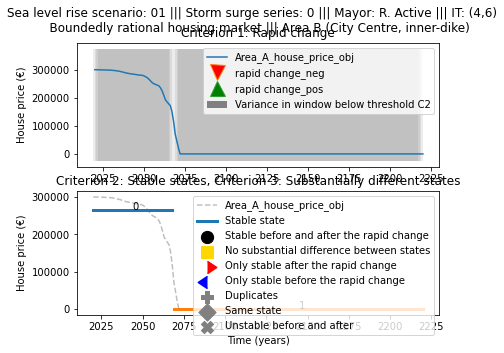

In [9]:
### Use a dummy fig to take the legend
dummy, axes = experiments[0].allMetrics[0].plot_SETPs(figsize=(6.5,5))

dummy, file_string = add_suptitle(dummy,experiments[0],M)

2021_2_25\SETP_identification\01_0_R.Active_(4,6)_subj_B.png


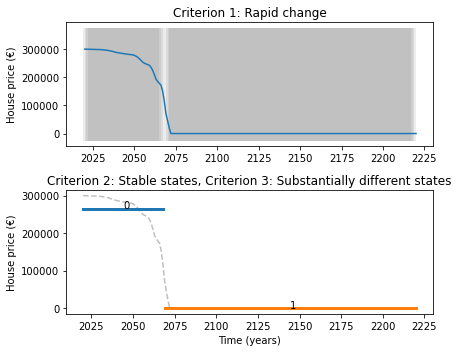

In [28]:
nr1 = sel_exp(experiments,SLR_scenarios='01',SurgeHeights='five_hundred_0',Mayors='R. Active',ITs=(4,6))[0]
exp = nr1 # Area_A, Housing Market
#1 gaat wel geleidelijk naar 0, maar nergens zo snel dat het een tipping point mag heten (je kunt wel stable states onderscheiden)


fig, axes = exp.allMetrics[0].plot_SETPs(figsize=(6.5,5))
for ax in axes:
    ax.get_legend().remove()
fig.tight_layout()

dummy, file_string = add_suptitle(dummy,exp,M) #We are only interested in the information on the filename, 
# the fig manipulation is therefore done on a dummy

filename = file_string.replace(" ", "")
to_save = target / (filename + '.png')
#fig.savefig(to_save,bbox_inches='tight',dpi=150)
print(to_save)

2021_2_25\SETP_identification\07_0_R.Active_(4,6)_subj_B.png


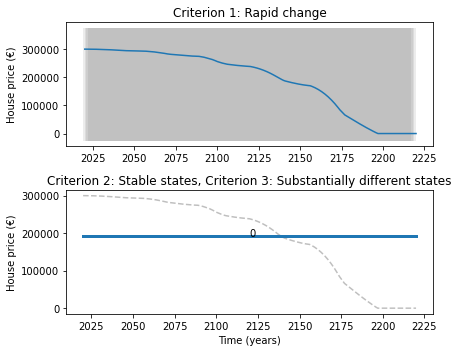

In [29]:
nr10 = sel_exp(experiments,SLR_scenarios='07',SurgeHeights='five_hundred_0',Mayors='R. Active',ITs=(4,6))[0]
exp = nr10 # Area_A, Housing Market
#1 gaat wel geleidelijk naar 0, maar nergens zo snel dat het een tipping point mag heten (je kunt wel stable states onderscheiden)


fig, axes = exp.allMetrics[0].plot_SETPs(figsize=(6.5,5))
for ax in axes:
    ax.get_legend().remove()
fig.tight_layout()

dummy, file_string = add_suptitle(dummy,exp,M) #We are only interested in the information on the filename, 
# the fig manipulation is therefore done on a dummy

filename = file_string.replace(" ", "")
to_save = target / (filename + '.png')
#fig.savefig(to_save,bbox_inches='tight',dpi=150)
print(to_save)

2021_2_25\SETP_identification\01_312_Sentiment_(11,16)_subj_B.png


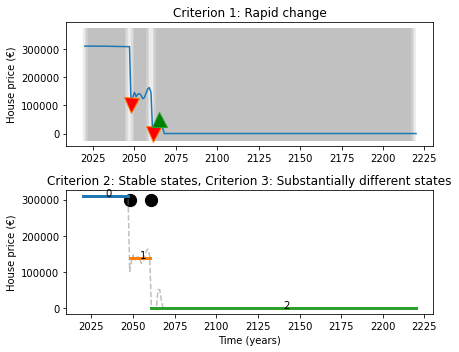

In [30]:
nr2 = sel_exp(experiments,SLR_scenarios='01',SurgeHeights='five_hundred_312',Mayors='Sentiment',ITs=(11,16))[0]
#A; BR => Deze gaat in twee duidelijke stappen naar 0, ziet er mooi uit!
exp=nr2

fig, axes = exp.allMetrics[1].plot_SETPs(figsize=(6.5,5))
for ax in axes:
    ax.get_legend().remove()
fig.tight_layout()

dummy, file_string = add_suptitle(dummy,exp,M) #We are only interested in the information on the filename, 
# the fig manipulation is therefore done on a dummy

filename = file_string.replace(" ", "")
to_save = target / (filename + '.png')
#fig.savefig(to_save,bbox_inches='tight',dpi=150)
print(to_save)

2021_2_25\SETP_identification\05_1_Sentiment_(9,13)_subj_B.png


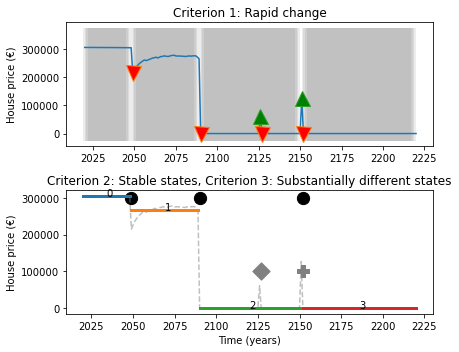

In [31]:
nr3 = sel_exp(experiments,SLR_scenarios='05',SurgeHeights='five_hundred_1',Mayors='Sentiment',ITs=(9,13))[0]
exp=nr3

fig, axes = exp.allMetrics[1].plot_SETPs(figsize=(6.5,5))
for ax in axes:
    ax.get_legend().remove()
fig.tight_layout()

dummy, file_string = add_suptitle(dummy,exp,M) #We are only interested in the information on the filename, 
# the fig manipulation is therefore done on a dummy

filename = file_string.replace(" ", "")
to_save = target / (filename + '.png')
#fig.savefig(to_save,bbox_inches='tight',dpi=150)
print(to_save)

2021_2_25\SETP_identification\09_0_H.Economicus_(9,13)_subj_B.png


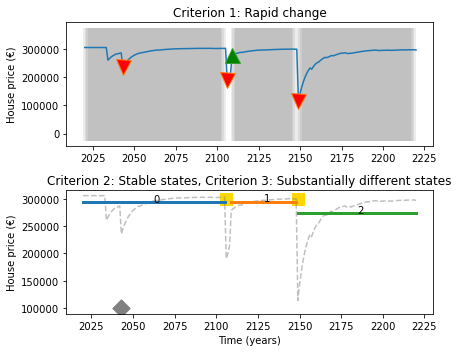

In [32]:
nr4 = sel_exp(experiments,SLR_scenarios='09',SurgeHeights='five_hundred_0',Mayors='H. Economicus',ITs=(9,13))[0]

exp=nr4
fig, axes = exp.allMetrics[1].plot_SETPs(figsize=(6.5,5))
for ax in axes:
    ax.get_legend().remove()
fig.tight_layout()

dummy, file_string = add_suptitle(dummy,exp,M) #We are only interested in the information on the filename, 
# the fig manipulation is therefore done on a dummy

filename = file_string.replace(" ", "")
to_save = target / (filename + '.png')
#fig.savefig(to_save,bbox_inches='tight',dpi=150)
print(to_save)

2021_2_25\SETP_identification\01_124_Lawkeeper_(4,6)_subj_B.png


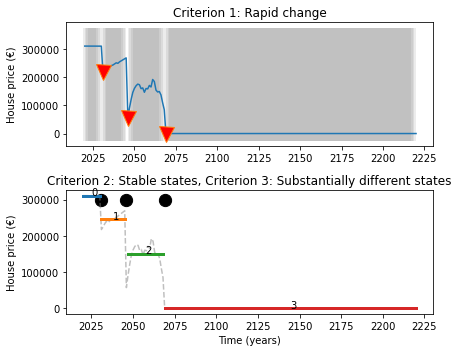

In [33]:
nr5 = sel_exp(experiments,SLR_scenarios='01',SurgeHeights='five_hundred_124',Mayors='Lawkeeper',ITs=(4,6))[0]

exp=nr5
fig, axes = exp.allMetrics[1].plot_SETPs(figsize=(6.5,5))
for ax in axes:
    ax.get_legend().remove()
fig.tight_layout()

dummy, file_string = add_suptitle(dummy,exp,M) #We are only interested in the information on the filename, 
# the fig manipulation is therefore done on a dummy

filename = file_string.replace(" ", "")
to_save = target / (filename + '.png')
#fig.savefig(to_save,bbox_inches='tight',dpi=150)
print(to_save)

2021_2_25\SETP_identification\02_2_R.Active_(14,20)_subj_B.png


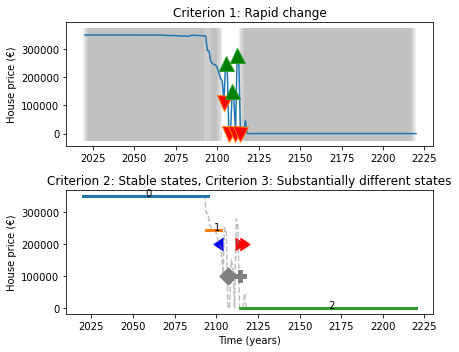

In [34]:
nr6 = sel_exp(experiments,SLR_scenarios='02',SurgeHeights='five_hundred_2',Mayors='R. Active',ITs=(14,20))[0]

exp=nr6
fig, axes = exp.allMetrics[3].plot_SETPs(figsize=(6.5,5))
for ax in axes:
    ax.get_legend().remove()
fig.tight_layout()

dummy, file_string = add_suptitle(dummy,exp,M) #We are only interested in the information on the filename, 
# the fig manipulation is therefore done on a dummy

filename = file_string.replace(" ", "")
to_save = target / (filename + '.png')
#fig.savefig(to_save,bbox_inches='tight',dpi=150)
print(to_save)

2021_2_25\SETP_identification\03_124_Lawkeeper_(4,6)_subj_B.png


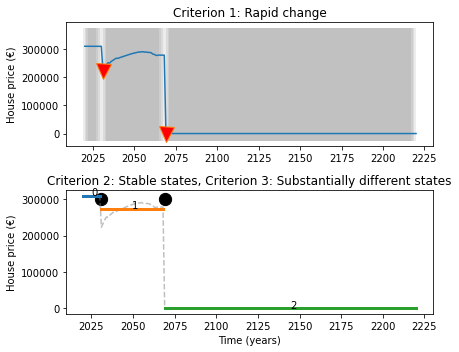

In [35]:
nr7 = sel_exp(experiments,SLR_scenarios='03',SurgeHeights='five_hundred_124',Mayors='Lawkeeper',ITs=(4,6))[0]

exp=nr7
fig, axes = exp.allMetrics[1].plot_SETPs(figsize=(6.5,5))
for ax in axes:
    ax.get_legend().remove()
fig.tight_layout()

dummy, file_string = add_suptitle(dummy,exp,M) #We are only interested in the information on the filename, 
# the fig manipulation is therefore done on a dummy

filename = file_string.replace(" ", "")
to_save = target / (filename + '.png')
#fig.savefig(to_save,bbox_inches='tight',dpi=150)
print(to_save)

### Select final four metrics

In [36]:
M1 = nr1.allMetrics[0]
M2 = nr5.allMetrics[1]
M3 = nr4.allMetrics[1]
M4 = nr6.allMetrics[3]

Small update 25/2

In [37]:
M1B = nr10.allMetrics[0]

# Now, make a new function to only plot the essential aspects

In [103]:
from tipping import mean_of_states
from matplotlib import patches
from matplotlib.collections import PatchCollection

def plot_SETPs_simple(M,state_lw,state_alpha,plot_state=True,plot_cands=[],**kwargs):
        """
        Plot the results
        
        This should be run after select_SETPs
        
        Arguments:
            *state_lw* (int) : linewidth of stable states
            *state_alpha* (float) : transparancy of state lines
            *plot_state* (bool) : plot states yes/no
            *plot_cands* (list) : indices of allSETPcands to plot
            
            **kwargs** () : will be passed to plt.subplots(
        
        Returns:
            fig,ax (matplotlib objects)
        
        """
        colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
        
        if not hasattr(M, '_window'):
            raise AttributeError('Window Metric._window is not defined, call Metric.create_statistics() first')
        if not hasattr(M, '_margin'):
            raise AttributeError('Margin Metric._margin is not defined, call Metric.find_SETP_candidates() first')
        
        window = M._window
        margin = M._margin
        
        fig, ax = plt.subplots(**kwargs)
        
        timeseries = M.statistics.iloc[:,0]
        
        #if plot_state:
        #    as_dict, as_df = mean_of_states(M.stable_states,timeseries)
        #    for i,state in enumerate(M.stable_states):
        #        x_values = list(range(state[0],state[1]+1))
        #        y_value = as_dict[i]
        #        if i == 0: #only for first item, prepare legend item
        #            ax.plot(x_values,[y_value]*len(x_values),lw=state_lw,label='Stable state',alpha=state_alpha,color=colors[i])
        #        else: 
        #            ax.plot(x_values,[y_value]*len(x_values),lw=state_lw,alpha=state_alpha,color=colors[i])
                #ax.text(sum(x_values)/len(x_values),y_value+7_000,str(i))
        
        #ALTERNATIVE TO PLOTTING STATES BY OMITTING LINES WITH A CERTAIN THICKNESS (25/2/2021)
        if plot_state:
            as_dict, as_df = mean_of_states(M.stable_states,timeseries)
            height = 20_000 #height of state box
            
            patches_list=[]
            for i,state in enumerate(M.stable_states): #state = (startyear,endyear)
                width = state[1] - state[0]
                y_value = as_dict[i] - 0.5*height
                print(colors[i])
                art = patches.Rectangle((state[0],y_value),width,height)
                patches_list.append(art)

            pc = PatchCollection(patches_list,facecolors=colors[0:len(M.stable_states)],alpha=state_alpha)
            ax.add_collection(pc)
            
        
        
        timeseries.plot(ax=ax,color='black')
        
        print("Tipping point candidates available for plotting: ")
        for cand in M.allSETPs_cands: print(cand)
        
        #Iterate over SETP candidates and plot selected ones:
        for i,cand in enumerate(M.allSETPs_cands):
            if i in plot_cands:
                year = cand.year
                x_value = cand.year-0.5
                y_value = (timeseries.loc[year] + timeseries.loc[year-1])/2
                ax.scatter(x_value,y_value,color='black')
        
        ax.set_xlabel('Time (years)')
        ax.set_ylabel('House price (€)')
        ax.set_xlim(2020,2220)
        ax.set_ylim(-20_000)
        
        return fig,ax

#1b9e77
#d95f02
#7570b3
Tipping point candidates available for plotting: 
2104__-1__ob__dup_first -dups with: (2105)
2105__1__ob__dup_
2107__-1__sw__dup_first -dups with: (2109)
2109__1__sw__dup_
2111__-1__oa__dup_first -dups with: (2112, 2114)
2112__1__oa__dup_
2114__-1__oa__dup_


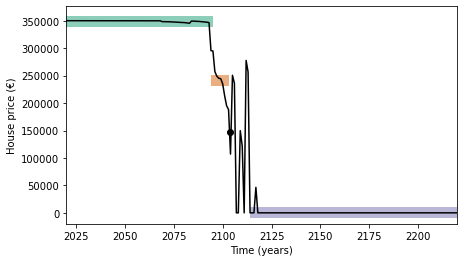

In [122]:
fig, ax = plot_SETPs_simple(M4,state_lw=10,state_alpha=0.5,plot_state=True,plot_cands=[0],figsize=(7,4))

In [123]:
fig.savefig(Path(target, "M4B.png"),bbox_inches='tight',dpi=150)